<a href="https://colab.research.google.com/github/bahmad6890/machine-learning/blob/master/Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [4]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/HealtyNormalized.csv")

#data = pd.read_csv('HealtyNormalized.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109553 entries, 0 to 1109552
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   vsH     1109553 non-null  float64
 1   vbH     1109552 non-null  float64
dtypes: float64(2)
memory usage: 16.9 MB


In [7]:
data.head()

,vsH,vbH
0,0.000998,-0.000217
1,0.001001,-0.000185
2,0.001002,-0.000152
3,0.001007,-0.000185
4,0.001010,-0.000217


In [8]:
vibration = data['vbH']
vibration = pd.DataFrame(vibration)
vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109553 entries, 0 to 1109552
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   vbH     1109552 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [9]:
vibration.head()

,vbH
0,-0.000217
1,-0.000185
2,-0.000152
3,-0.000185
4,-0.000217


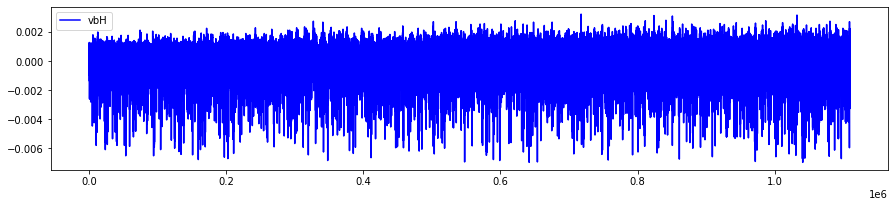

In [10]:
dataset = vibration.plot(color='b',figsize = (15,3))

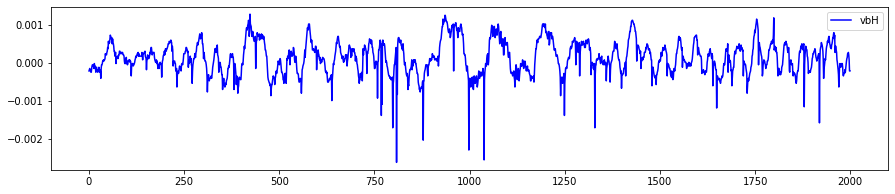

In [11]:
dataset = vibration.iloc[0:2000].plot(color='b',figsize = (15,3))

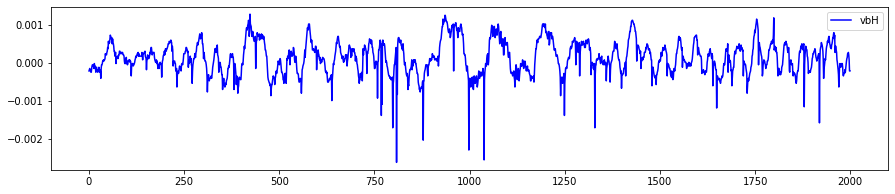

In [12]:
smallDataset = vibration.iloc[0:2000]
smallDataset.plot(color='b',figsize = (15,3))

In [13]:
smallDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vbH     2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(smallDataset)
normalizedVibration = pd.DataFrame(normalizedVibration)

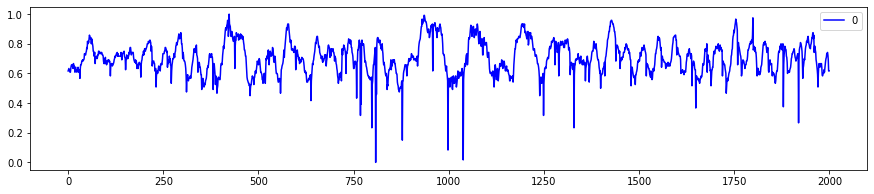

In [15]:
normalizedVibration.plot(color='b',figsize = (15,3))

In [16]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset.tail()

,0
1995,0.741667
1996,0.725000
1997,0.691667
1998,0.616667
1999,0.616667


In [17]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

Total Dataset   =  2000
Training Smaple =  1340
Testing Sample  =  660


In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [19]:
test[0].iloc[1:6]

1341    0.700000
1342    0.708333
1343    0.683333
1344    0.666667
1345    0.675000
Name: 0, dtype: float64

In [20]:
test[0].describe()

count    660.000000
mean       0.705429
std        0.093316
min        0.266667
25%        0.641667
50%        0.700000
75%        0.766667
max        0.975000
Name: 0, dtype: float64

In [21]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)

In [22]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [23]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1319/1319 - 3s - loss: 0.0845
Epoch 2/20
1319/1319 - 1s - loss: 0.0439
Epoch 3/20
1319/1319 - 1s - loss: 0.0415
Epoch 4/20
1319/1319 - 1s - loss: 0.0389
Epoch 5/20
1319/1319 - 1s - loss: 0.0379
Epoch 6/20
1319/1319 - 1s - loss: 0.0366
Epoch 7/20
1319/1319 - 1s - loss: 0.0357
Epoch 8/20
1319/1319 - 1s - loss: 0.0360
Epoch 9/20
1319/1319 - 1s - loss: 0.0354
Epoch 10/20
1319/1319 - 1s - loss: 0.0348
Epoch 11/20
1319/1319 - 1s - loss: 0.0359
Epoch 12/20
1319/1319 - 1s - loss: 0.0354
Epoch 13/20
1319/1319 - 1s - loss: 0.0344
Epoch 14/20
1319/1319 - 1s - loss: 0.0334
Epoch 15/20
1319/1319 - 1s - loss: 0.0336
Epoch 16/20
1319/1319 - 1s - loss: 0.0337
Epoch 17/20
1319/1319 - 1s - loss: 0.0328
Epoch 18/20
1319/1319 - 1s - loss: 0.0324
Epoch 19/20
1319/1319 - 1s - loss: 0.0326
Epoch 20/20
1319/1319 - 1s - loss: 0.0326


In [24]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: MAE 0.00011971523364807281
Test Score: MAE 0.00011731984778978804


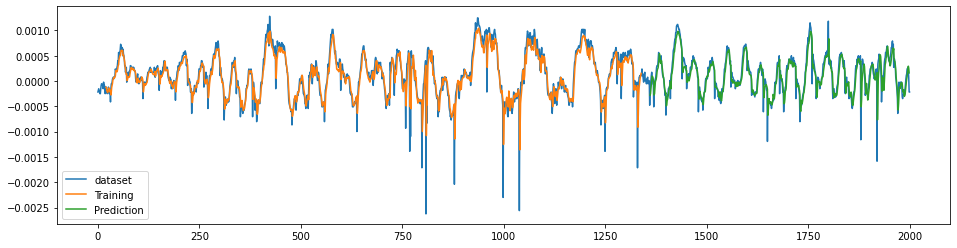

In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(dataset),label='dataset')
plt.plot(trainPredictPlot, label='Training')
plt.plot(testPredictPlot,label='Prediction')
plt.legend();
plt.show()
